In [47]:
import numpy as np
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn.preprocessing import binarize
from skimage.transform import downscale_local_mean, rescale
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
# import sys
# np.set_printoptions(threshold=sys.maxsize)


In [2]:


mnist = fetch_openml('mnist_784', cache=False)

binary_mnist_data = binarize(mnist.data)
binary_mnist_target = mnist.target.astype(np.int)

# training size
N = 500

binary_mnist_test_data = binary_mnist_data[N:2 * N]
binary_mnist_test_target = binary_mnist_target[N:2 * N]

binary_mnist_data = binary_mnist_data[0:N]
binary_mnist_target = binary_mnist_target[0:N]

digit_samples = []
for i in range(10):
    digit_samples.append(binary_mnist_data[np.where(binary_mnist_target == i)])


28


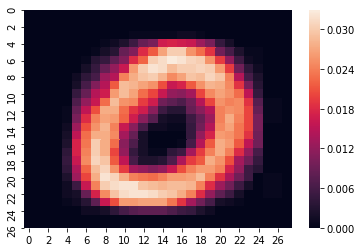

28


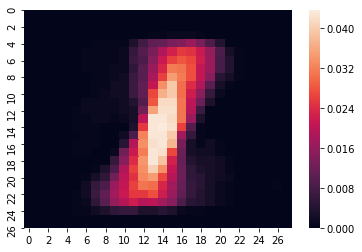

28


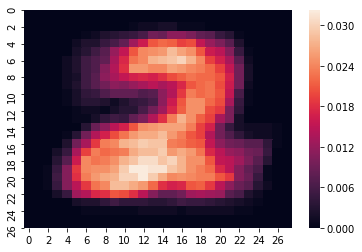

28


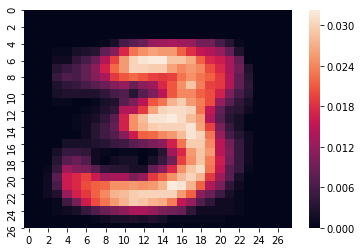

28


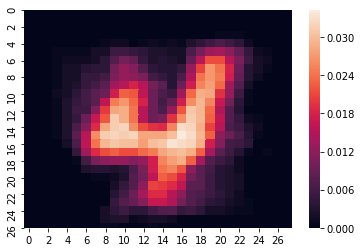

28


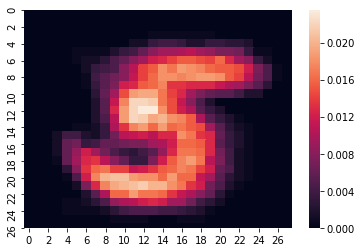

28


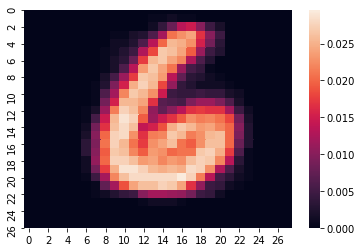

28


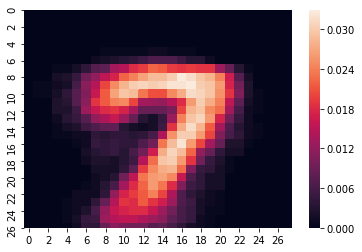

28


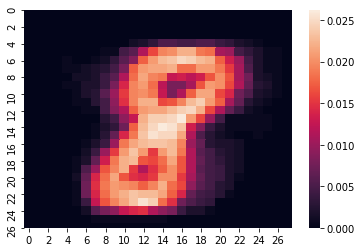

28


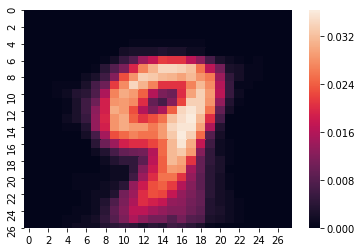

In [70]:
def plot_binarized_digit(img_vector, i):
    n = np.int(np.sqrt(img_vector.shape))
    fig = plt.figure()
    plt.imshow(img_vector.reshape(n, n),cmap='gray')
    plt.show()
    fig.savefig('binarized-digit_' + str(i) + '.png')

    
def plot_heatmap_binarized_digit(img_vector, i):
    img_vector = np.array(img_vector)
    n = np.int(np.sqrt(np.size(img_vector)))
    fig = plt.figure()
    sns.heatmap(img_vector.reshape(n, n))
    fig.savefig('binarized-digit-heatmap_' + str(i) + '.png')
    plt.show()
    

# adding all values of one digit's values to make one digit 
digits_sum_list = []
for j in range(10):  
    sum = 0
    for i in digit_samples[j]:
        sum += i
    digits_sum_list.append(sum)

digits_sum_list = np.array(digits_sum_list)

n = np.int(np.sqrt(digits_sum_list.shape[1]))
# normalize array
digits_sum_list = digits_sum_list/np.linalg.norm(digits_sum_list)
# print(digits_sum_list)



# plot 10th batch of samples
# for i in range(10):
#     plot_binarized_digit(digit_samples[i][10],i)

for i in range(10):
    plot_heatmap_binarized_digit(digits_sum_list[i],i)


# plot all batches for each digit
# plot_binarized_digit_all(digit_samples)

# print(np.array(digit_samples).shape)
# print(np.array(digit_samples))
# plt.imshow(digit_samples[5][0].reshape(n, n),cmap='gray')
# plt.show()
# plt = show()
# plt.savefig('sample_0.png')
# plt = show(digit_samples[1][0])
# plt.savefig('sample_1.png')
# plt = show(digit_samples[2][0])
# plt = show(digit_samples[3][0])